# Step 1: Import Libraries

In [2]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Step 2: Load Dataset

In [7]:
df= pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\BIA\Smoker\test.csv")
df= pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\BIA\Smoker\train.csv")
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1.0
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0.0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1.0
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0.0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1.0


# Step 3: Explore Data

In [15]:
# Check info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265427 entries, 0 to 265426
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   265427 non-null  int64  
 1   age                  265427 non-null  int64  
 2   height(cm)           265427 non-null  int64  
 3   weight(kg)           265427 non-null  int64  
 4   waist(cm)            265427 non-null  float64
 5   eyesight(left)       265427 non-null  float64
 6   eyesight(right)      265427 non-null  float64
 7   hearing(left)        265427 non-null  int64  
 8   hearing(right)       265427 non-null  int64  
 9   systolic             265427 non-null  int64  
 10  relaxation           265427 non-null  int64  
 11  fasting blood sugar  265427 non-null  int64  
 12  Cholesterol          265427 non-null  int64  
 13  triglyceride         265427 non-null  int64  
 14  HDL                  265427 non-null  int64  
 15  LDL              

In [16]:

# Check missing values
print(df.isnull().sum())

id                          0
age                         0
height(cm)                  0
weight(kg)                  0
waist(cm)                   0
eyesight(left)              0
eyesight(right)             0
hearing(left)               0
hearing(right)              0
systolic                    0
relaxation                  0
fasting blood sugar         0
Cholesterol                 0
triglyceride                0
HDL                         0
LDL                         0
hemoglobin                  0
Urine protein               0
serum creatinine            0
AST                         0
ALT                         0
Gtp                         0
dental caries               0
smoking                106171
dtype: int64


In [12]:

# Check unique values per column
print(df.nunique())

id                     265427
age                        21
height(cm)                 18
weight(kg)                 32
waist(cm)                 541
eyesight(left)             21
eyesight(right)            19
hearing(left)               2
hearing(right)              2
systolic                  120
relaxation                 81
fasting blood sugar       239
Cholesterol               241
triglyceride              396
HDL                       112
LDL                       235
hemoglobin                138
Urine protein               6
serum creatinine           28
AST                       154
ALT                       193
Gtp                       389
dental caries               2
smoking                     2
dtype: int64


In [17]:
# Basic statistics
print(df.describe())


                  id            age     height(cm)     weight(kg)  \
count  265427.000000  265427.000000  265427.000000  265427.000000   
mean   132713.000000      44.354591     165.248686      67.136444   
std     76622.319288      11.864380       8.826224      12.586326   
min         0.000000      20.000000     135.000000      30.000000   
25%     66356.500000      40.000000     160.000000      60.000000   
50%    132713.000000      40.000000     165.000000      65.000000   
75%    199069.500000      55.000000     170.000000      75.000000   
max    265426.000000      85.000000     190.000000     130.000000   

           waist(cm)  eyesight(left)  eyesight(right)  hearing(left)  \
count  265427.000000   265427.000000    265427.000000  265427.000000   
mean       83.001151        1.005389         1.000387       1.024071   
std         8.953381        0.400349         0.389693       0.153269   
min        51.000000        0.100000         0.100000       1.000000   
25%        77.0000

# Step 4: Data Cleaning

In [18]:
# Replace empty strings with NaN
df.replace(" ", np.nan, inplace=True)

In [19]:
# Drop missing values
df.dropna(inplace=True)


In [22]:
# Reset index
df.reset_index(drop=True, inplace=True)
df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1.0
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0.0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1.0
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0.0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0.0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0.0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0.0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1.0


# Step 5: Encode Categorical Columns

In [24]:
# Find categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", cat_cols)

# Encode categorical variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


Categorical Columns: Index([], dtype='object')


# Step 6: Feature Scaling

In [26]:
# Select numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('smoking')  # Drop target column

# Scale features
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0.000000,0.538462,0.545455,0.30,0.394737,0.040816,0.051020,0.0,0.0,0.426471,...,0.244094,0.039806,0.720497,0.0,0.091837,0.020725,0.008239,0.025075,0.0,1.0
1,0.000006,0.769231,0.545455,0.35,0.500000,0.051020,0.061224,1.0,1.0,0.507353,...,0.377953,0.067240,0.701863,0.0,0.102041,0.027202,0.007552,0.035105,1.0,0.0
2,0.000013,0.000000,0.636364,0.45,0.394737,0.030612,0.040816,0.0,0.0,0.301471,...,0.283465,0.049489,0.776398,0.0,0.071429,0.027202,0.010299,0.051153,0.0,1.0
3,0.000019,0.230769,0.818182,0.65,0.710526,0.142857,0.112245,0.0,0.0,0.397059,...,0.228346,0.054330,0.683230,0.0,0.091837,0.018135,0.008926,0.028084,1.0,0.0
4,0.000025,0.153846,0.545455,0.30,0.388158,0.142857,0.091837,0.0,0.0,0.323529,...,0.275591,0.049489,0.652174,0.0,0.071429,0.016839,0.004119,0.015045,0.0,1.0


# Step 7: Split Data (Train/Test)

In [28]:
X = df.drop('smoking', axis=1)
y = df['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)


(127404, 23) (31852, 23)


# Step 8: Train Models

In [30]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n🔹 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



🔹 Logistic Regression Results:
Accuracy: 0.7444116538992842
Confusion Matrix:
 [[13410  4373]
 [ 3768 10301]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.75      0.77     17783
         1.0       0.70      0.73      0.72     14069

    accuracy                           0.74     31852
   macro avg       0.74      0.74      0.74     31852
weighted avg       0.75      0.74      0.74     31852


🔹 Random Forest Results:
Accuracy: 0.7717568755494161
Confusion Matrix:
 [[13372  4411]
 [ 2859 11210]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.75      0.79     17783
         1.0       0.72      0.80      0.76     14069

    accuracy                           0.77     31852
   macro avg       0.77      0.77      0.77     31852
weighted avg       0.78      0.77      0.77     31852



C:\ProgramData\anaconda3\New folder\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:02:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 XGBoost Results:
Accuracy: 0.7804847419314329
Confusion Matrix:
 [[13579  4204]
 [ 2788 11281]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.76      0.80     17783
         1.0       0.73      0.80      0.76     14069

    accuracy                           0.78     31852
   macro avg       0.78      0.78      0.78     31852
weighted avg       0.78      0.78      0.78     31852



# Step 9: Check Feature Importance

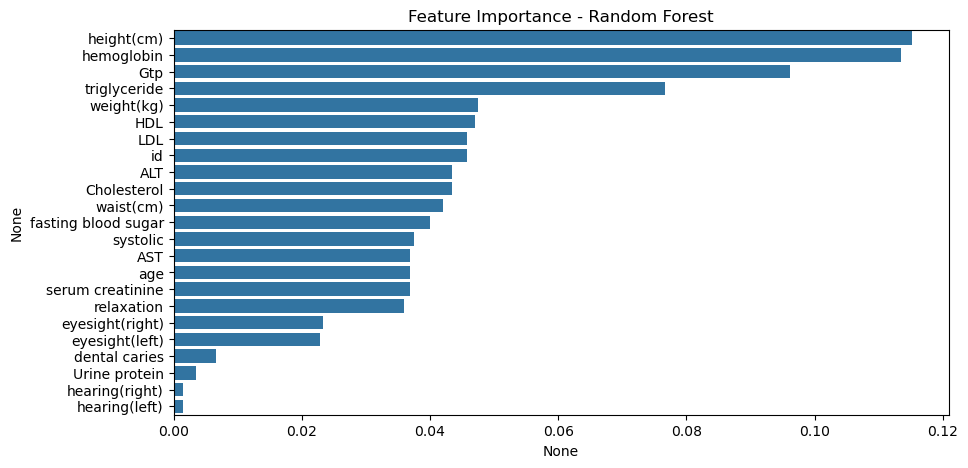

In [32]:
rf_model = models['Random Forest']
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance - Random Forest")
plt.show()


# Step 10: Visualize Correlations & Churn Patterns

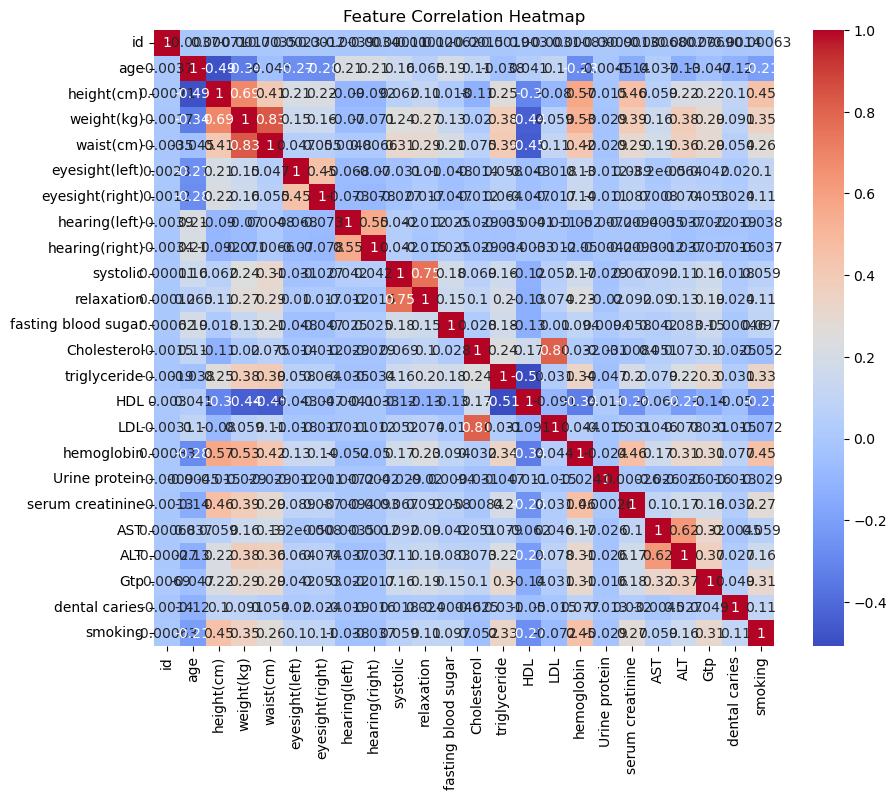

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Step 11: Interpret Model Using SHAP

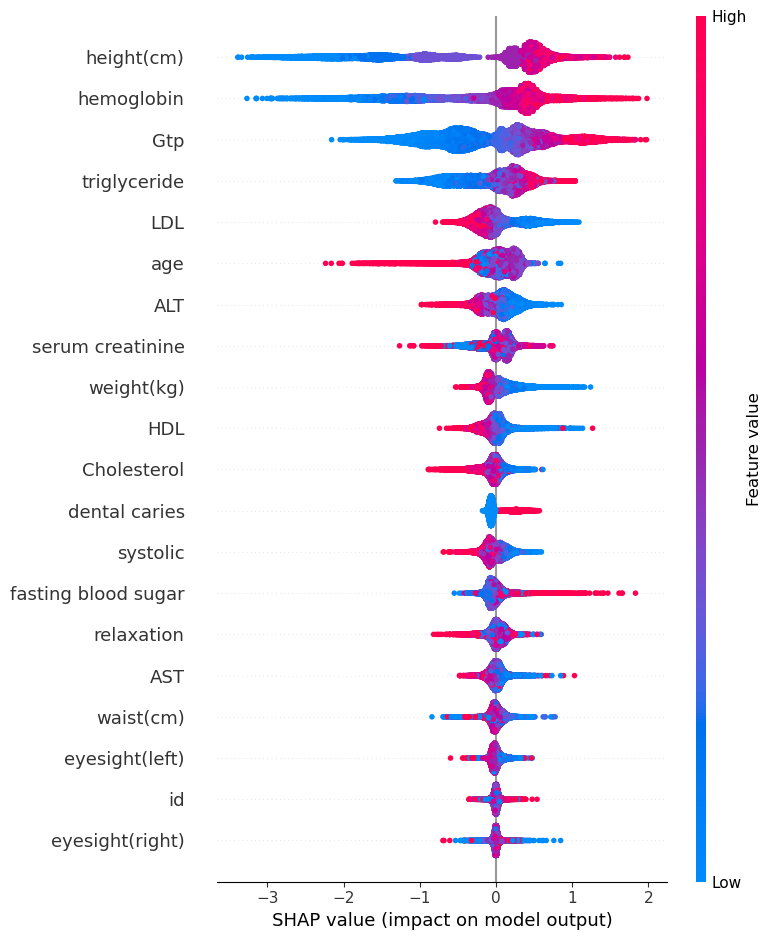

In [37]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
